In [1]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet, fcluster
from scipy.spatial.distance import pdist
import numpy as np
import pandas as pd
import os

%matplotlib inline

In [5]:
df = pd.read_csv("../../assets/datasets/lang.csv")
df.head()

,country,finnish,swedish,danish,norwegian,english,german,dutch,flemish,french,italian,spanish,portuguese
0,1,0,0,0,0,21,100,2,1,10,2,1,0
1,2,0,0,0,0,5,3,0,0,11,100,1,0
2,3,0,2,3,0,10,7,1,1,100,12,7,1
3,4,0,0,0,0,41,47,100,100,16,2,2,0
4,5,0,0,0,0,14,15,0,59,44,2,1,0


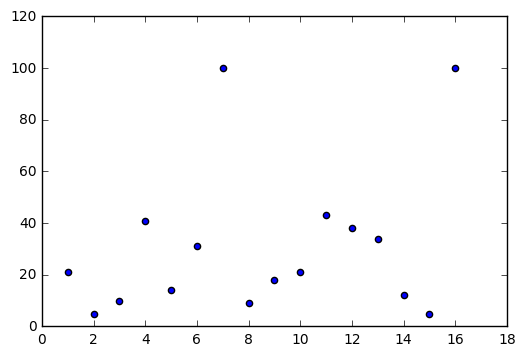

In [6]:
plt.scatter(df['country'], df['english'])
plt.show()

In [7]:
X = df.as_matrix(columns=None)

In [8]:
Z = linkage(X, 'ward')

In [9]:
c, coph_dists = cophenet(Z, pdist(X))
print c

0.666459256032


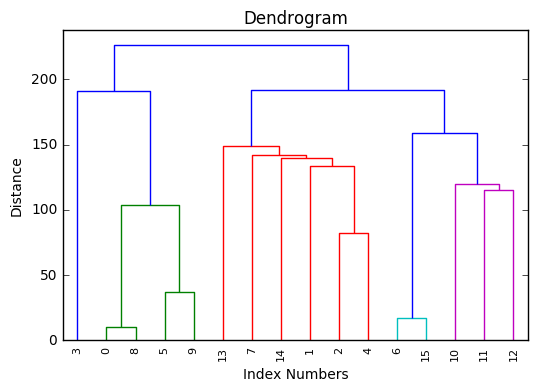

In [10]:
plt.title('Dendrogram')
plt.xlabel('Index Numbers')
plt.ylabel('Distance')
dendrogram(
    Z,
    leaf_rotation=90.,  
    leaf_font_size=8.,
)
plt.show()

In [11]:
max_dist = 200
clusters = fcluster(Z, max_dist, criterion='distance')
clusters

array([1, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2], dtype=int32)

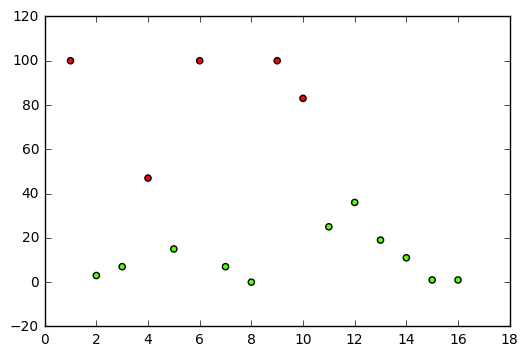

In [12]:
plt.scatter(X[:,0], X[:,6], c=clusters, cmap='prism')
plt.show()